In [1]:
# https://www.kernix.com/blog/image-classification-with-a-pre-trained-deep-neural-network_p11
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import re

import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
import numpy as np
import pandas as pd
import sklearn
from sklearn import cross_validation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

Populating the interactive namespace from numpy and matplotlib


/Users/guilherme/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
model_dir = './'
# images_dir = './preprocessedImages/'
# list_images = [images_dir+f for f in os.listdir(images_dir) if re.search('jpg|JPG|png|PNG', f)]
list_images = pickle.load(open('listImages'))

In [4]:
def create_graph():
    with gfile.FastGFile(os.path.join(model_dir, 'classify_image_graph_def.pb'), 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(graph_def, name='')

In [5]:
def extract_features(list_images):
    nb_features = 2048
    features = np.empty((len(list_images),nb_features))
    labels = []

    create_graph()
    with tf.Session() as sess:
        next_to_last_tensor = sess.graph.get_tensor_by_name('pool_3:0')
    
    for ind, image in enumerate(list_images):
        if (ind%100 == 0):
            print('Processing %s...' % (image))
        if not gfile.Exists(image):
            tf.logging.fatal('File does not exist %s', image)
        try:
            image_data = gfile.FastGFile(image, 'rb').read()
            predictions = sess.run(next_to_last_tensor,
            {'DecodeJpeg/contents:0': image_data})
            features[ind,:] = np.squeeze(predictions)
            labels.append(re.split('_\d+',image.split('/')[1])[0])
        except:
            print 'Error occurred, move on...'
            

    return features, labels

In [ ]:
features,labels = extract_features(list_images)

print features
print features.shape
print labels

Processing ./preprocessedImages/ec674fd8e59935193423338be05558abf19b14fb.jpg...
Processing ./preprocessedImages/8b0b8eaa778d9dd5a5a12204c4eb89c60521e15d.jpg...
Processing ./preprocessedImages/bbca0446fc62781928de3e09b99ad389773f20c1.jpg...
Processing ./preprocessedImages/108230d3776e519cd2f07fba70c273185d09dcb5.jpg...
Processing ./preprocessedImages/d1db0c55a8af0ddd0e9cbc2ab668d4b06a71fccf.jpg...
Processing ./preprocessedImages/106c0e21768fa6205966045e50616b9bb63f36bc.jpg...
Error occurred, move on...


In [9]:
pickle.dump(features, open('features100', 'wb'))
pickle.dump(labels, open('labels100', 'wb'))

In [10]:
from sklearn.neighbors import NearestNeighbors

In [14]:
neigh = NearestNeighbors(2, 0.4)
neigh.fit(features)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=2, p=2, radius=0.4)

/Users/guilherme/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Distances:  [[  0.           9.83213497  10.03511098  10.09267726  10.09885944
   10.11570148  10.31549056  10.31734942  10.41911216  10.4306197 ]]


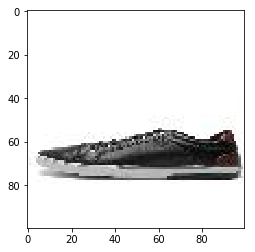

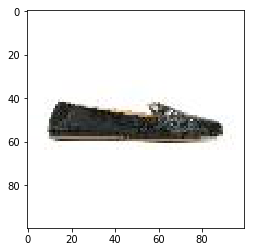

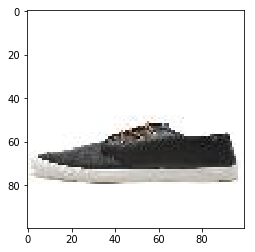

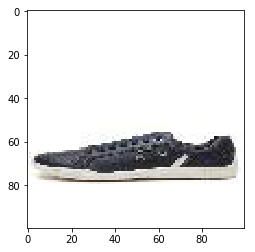

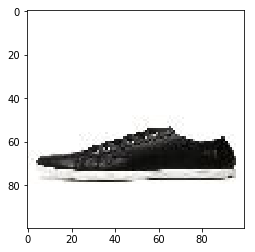

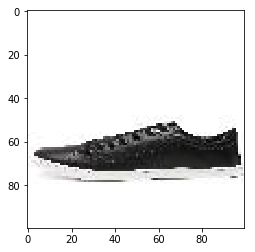

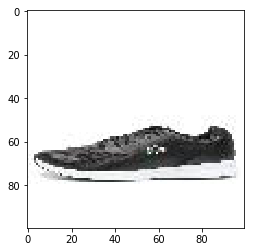

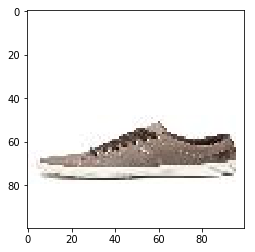

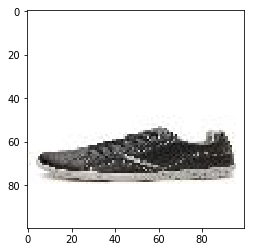

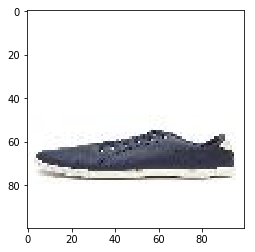

In [18]:
kneighbors = neigh.kneighbors(features[7], 10)
print 'Distances: ', kneighbors[0]

for index in np.nditer(kneighbors[1]):
    img=mpimg.imread(list_images[index])
    plt.figure()
    imgplot = plt.imshow(img)
plt.show()